# Introduction to Artificial Neural Networks (ANN)

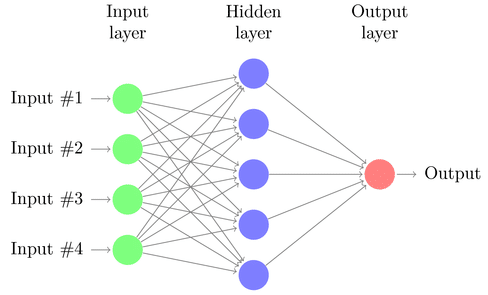

### A single neuron

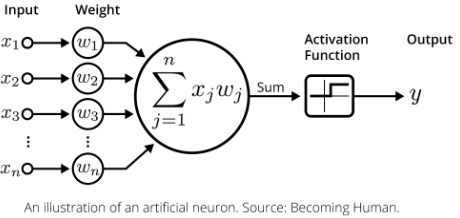

for each node the weighted sum is calculated and a bias(b) is added at the end

Sum = x1(w1) + x2(w2) + x3(w3) . . . xn(wn) + b 

The sum is passed to an activation function which returns the output value y

y=ActivationFunction(Sum)

## Popular Activation Functions

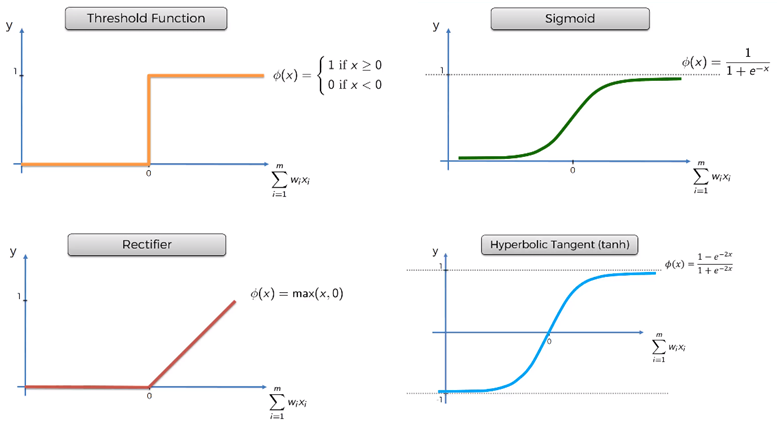

## Using ANN on CarPricesData

In [5]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('E:/IVY/ML with PYTHON/Materials/Dataset/Deep Learning Notebooks/Deep Learning Notebooks/CarPricesDataNumeric.pkl')
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [29]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [30]:
import opencv

ModuleNotFoundError: No module named 'opencv'

## Splitting the Data into Training and Testing

In [6]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999, 1)
(429, 11)
(429, 1)


In [8]:
# Standardized predictors
X[0:3]

array([[-1.79400224, -0.58190964, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.79400224,  0.11238127, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.73978236, -0.72303656, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675]])

In [9]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[   23., 46986.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   23., 72937.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   24., 41711.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.]])

In [4]:
# Installing required libraries
# !pip install tensorflow
# !pip install keras

## Regression using Deep Learning- Artificial Neural Networks(ANN)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))


# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [13]:
# Fitting the ANN to the Training set
#1000/20 --- forward/backward
model.fit(X_train, y_train ,batch_size = 30, epochs = 5, verbose=1)

Epoch 1/5
34/34 [==============================] - 4s 2ms/step - loss: 0.9926
Epoch 2/5
34/34 [==============================] - 0s 878us/step - loss: 0.9477
Epoch 3/5
34/34 [==============================] - 0s 2ms/step - loss: 0.8592
Epoch 4/5
34/34 [==============================] - 0s 1ms/step - loss: 0.7878
Epoch 5/5
34/34 [==============================] - 0s 1ms/step - loss: 0.6423


## Finding best set of parameters using manual grid search

In [14]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 30]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='rmsprop')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [15]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 77.52851275525185
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 79.791768636063
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 87.70341165432993
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 88.26426364258046
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 73.09065558205617
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 80.44351001761144
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 88.55319215084923
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 82.20259899500063
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 70.92388778104198
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 76.33314163281949
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 86.11824367915625
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 91.60958475277423
13 Parameters: batch_size: 30 - epochs: 5 Accuracy: 78.3495242669151
14 Parameters: batch_size: 30 - epochs: 10 Accuracy: 71.76737915492515
15 Parameters: batch_si

### Plotting the parameter search results

<AxesSubplot:xlabel='Parameters'>

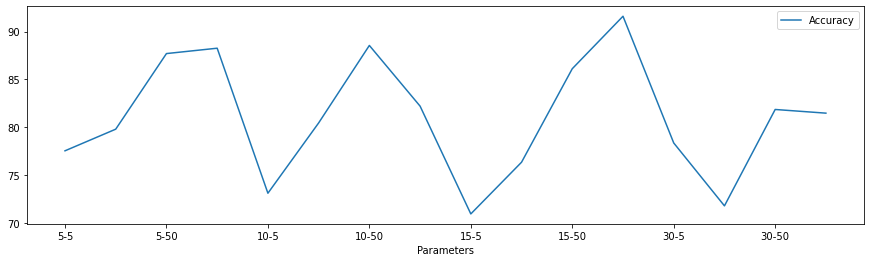

In [16]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Generating the model using best hyperparameters

In [17]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=0)

### Generating the predictions on Testing Data

In [18]:
# Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,15990.970703
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,8072.210449
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,11106.688477
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,13828.231445
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9651.440430


In [19]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
CarPricesDataNumeric[CarPricesDataNumeric['KM']==89520]

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
1197,8950,76.0,89520,110,1,0,1600.0,3,1050.0,0,0,1


### Calculating the Accuracy on Testing Data

In [20]:
APE=100* (abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 90.11702902387024


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,15990.970703,3.085026
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,8072.210449,9.807704
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,11106.688477,7.057000
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,13828.231445,8.926597
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9651.440430,8.443151


### Analyzing the errors

In [21]:
# Printing top 10 errors made by model
TestingData.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
295,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750.0,8848.880859,86.292229
366,58.0,43000.0,110.0,1.0,1.0,1600.0,4.0,1114.0,1.0,0.0,0.0,7950.0,11855.592773,49.126953
419,80.0,70939.0,110.0,1.0,1.0,1600.0,5.0,1100.0,0.0,0.0,1.0,6900.0,10278.864258,48.969047
242,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400.0,6459.370117,46.803866
421,48.0,28656.0,97.0,0.0,0.0,1400.0,3.0,1085.0,0.0,0.0,1.0,9950.0,13632.248047,37.007518
193,36.0,36269.0,110.0,1.0,0.0,1600.0,5.0,1075.0,0.0,0.0,1.0,10750.0,14416.076172,34.103034
221,42.0,27141.0,97.0,1.0,0.0,1400.0,5.0,1060.0,0.0,0.0,1.0,9950.0,13303.451172,33.703027
225,8.0,6000.0,90.0,1.0,0.0,2000.0,5.0,1280.0,0.0,1.0,0.0,24990.0,17527.056641,29.863719
359,39.0,18500.0,110.0,0.0,0.0,1600.0,4.0,1030.0,0.0,0.0,1.0,10250.0,13280.679688,29.567607
338,8.0,13253.0,116.0,1.0,0.0,2000.0,5.0,1320.0,0.0,1.0,0.0,24950.0,17594.652344,29.480351


<AxesSubplot:>

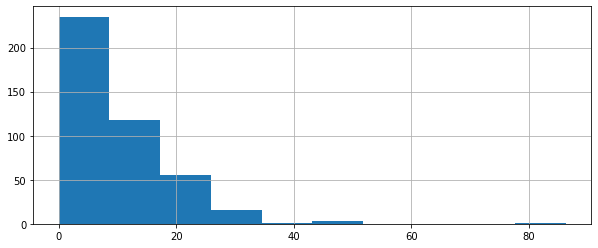

In [22]:
# Looking at the distribution is errors
%matplotlib inline
TestingData['APE'].hist(figsize=(10,4))

<AxesSubplot:>

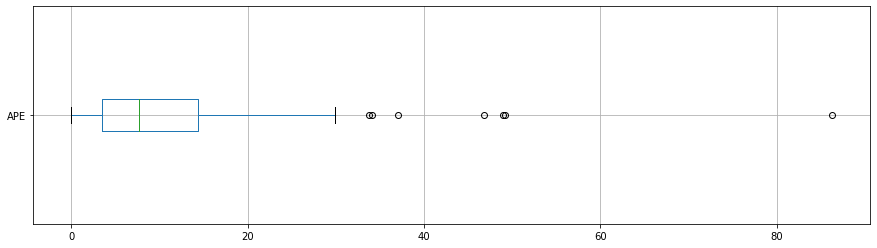

In [23]:
TestingData.boxplot(column='APE', figsize=(15,4), vert=False)

## Sklearn GridSearchCV 

In [24]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


Parameter_Trials={'batch_size':[5,10,15,20,30],
                      'epochs':[5,10,20,50,100],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }


RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [26]:
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [27]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, param_grid=Parameter_Trials, scoring=custom_Scoring, cv=5)

In [ ]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

In [24]:
grid_search.best_params_

{'Optimizer_trial': 'rmsprop', 'batch_size': 30, 'epochs': 5}

In [25]:
grid_search.best_score_

90.44597786231296

In [31]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])